# Exercise 01 - Hello TensorFlow

## Learning objectives

- Become familiar with JupyterLab and working with Jupyter notebooks
- Learn how to select a free (not fully utilized) GPU in TensorFlow
- Train your first neural network
- Monitor the GPU usage within a terminal window
- See how to free all resources

This exercise is **not** intended to learn anything about neural networks or to understand all the details of the program code. It is more about getting to know the technical infrastructure of the course where multiple users work on a server at the same time. An important aspect is to learn how to release the computer resources at the end of use, as otherwise the resources remain occupied and cannot be used by other students.

## Seting up a GPU

GPUs are graphics processing units that contain special computing cores for Deep Learning tasks. Before you can start, you have to find a GPU on the system that is not heavily used by other users. Otherwise you cannot initialize your neural network.

Open a new launcher by pressing the + symbol (located right under the Edit menu) and choose to start a new terminal session (the black symbol with $_). In this terminal window, type the command 'nvidia-smi' (without the single quotation mark) and press enter. 

**Hint:** the command is **nvidia-smi**, just in case it is displayed above in two lines because of a line break.

As a result you get a summary of the GPUs available in the system, their current memory usage (in MiB for megabytes), and their current utilization (in %). There should be six or eight GPUs listed and these are numbered 0 to n-1 (n being the number of GPUs). The GPU numbers (ids) are quite at the beginning of each GPU section and their numbers increase from top to bottom by 1.

Find a GPU where the memory usage is low. For this purpose look at the memory usage, which looks something like '365MiB / 16125MiB'. The first value is the already used up memory and the second value is the total memory of the GPU. Look for a GPU where there is a large difference between the first and the second value.

**Remember the GPU id and write it in the next line instead of the character X.**

In [1]:
# Change X to the GPU number you want to use,
# otherwise you will get a Python error
# e.g. USE_GPU = 4
USE_GPU = 7

Alternatively, you can use the terminal command in the Jupyter notebook by prefixing the command with an exclamation mark.

In [2]:
!nvidia-smi

Sat Nov  6 12:19:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 5000     On   | 00000000:01:00.0 Off |                  Off |
| 33%   30C    P8    17W / 230W |      1MiB / 16125MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 5000     On   | 00000000:24:00.0 Off |                  Off |
| 33%   

The advantage of using a terminal windows is that you can use it while the Jupyter notebook runs a cell. For example, the training of the neural network might take quite some time and while the cell (the training process) is not finished, you cannot execute another cell in the notebook. But you can switch to the terminal window and check the GPU at during training to can monitor your memory usage and utilization of the GPU you use.

### Choose one GPU

**The following code is very important and must always be executed before using TensorFlow in the exercises, so that only one GPU is used and that it is set in a way that not all its memory is used at once. Otherwise, the other students will not be able to work with this GPU.**

The following program code imports the TensorFlow library for Deep Learning and outputs the version of the library.

Then, TensorFlow is configured to only see the one GPU whose number you wrote in the above cell (USE_GPU = X) instead of the X.

Finally, the GPU is set so that it does not immediately reserve all memory, but only uses more memory when needed. 

(The comments within the code cell explains a bit of what is happening if you are interested to better understand it. See also the documentation of TensorFlow for an explanation of the used methods.)

In [3]:
# Import TensorFlow 
import tensorflow as tf

# Print the installed TensorFlow version
print(f'TensorFlow version: {tf.__version__}\n')

# Get all GPU devices on this server
gpu_devices = tf.config.list_physical_devices('GPU')

# Print the name and the type of all GPU devices
print('Available GPU Devices:')
for gpu in gpu_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set only the GPU specified as USE_GPU to be visible
tf.config.set_visible_devices(gpu_devices[USE_GPU], 'GPU')

# Get all visible GPU  devices on this server
visible_devices = tf.config.get_visible_devices('GPU')

# Print the name and the type of all visible GPU devices
print('\nVisible GPU Devices:')
for gpu in visible_devices:
    print(' ', gpu.name, gpu.device_type)
    
# Set the visible device(s) to not allocate all available memory at once,
# but rather let the memory grow whenever needed
for gpu in visible_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

TensorFlow version: 2.3.0

Available GPU Devices:
  /physical_device:GPU:0 GPU
  /physical_device:GPU:1 GPU
  /physical_device:GPU:2 GPU
  /physical_device:GPU:3 GPU
  /physical_device:GPU:4 GPU
  /physical_device:GPU:5 GPU
  /physical_device:GPU:6 GPU
  /physical_device:GPU:7 GPU

Visible GPU Devices:
  /physical_device:GPU:7 GPU


You will not have any advantages if you have more GPUs visible. Your network will not train faster as it will just use the first GPU available. In contrast, if all students have all GPUs visible, then you will very likely share the same GPU. Better choose a GPU that is not currently used. 

Another disadvantage is that if all GPUs are visible, then you will use up a small portion of memory from every GPU. If all students do that, then the GPU memory of your unused GPUs are wasted without doing any work for you.

If a GPU runs out of memory, then no further neural networks can be compiled and created on it.

## Loading data

The Keras framework of TensorFlow has a number of functions to load popular datasets for Deep Learning. We will train the neural network on the Fashion-MNIST dataset from Zalando, which contains 60,000 training images (and 10,000 test images) of fashion and clothing items, taken from 10 classes.

The dataset is loaded by calling the **load_data()** function from the Keras datasets module. Each image is 28×28 pixels in size and features (one channel of) grayscale values, so that an image contains 784 pixels in total.

We convert the pixel intensities from integer to floating point values, and scale the pixel intensities to the range between 0.0 and 1.0, by dividing each value by 255.0. This is called normalization, and as you will learn in the next weeks, data normalization improves the training of neural networks.

In [4]:
print('Loading data...\n')
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('FASHION MNIST dataset loaded.\n')

X_train = X_train / 255.0
X_test = X_test / 255.0

Loading data...

4423680/4422102 [==============================] - 0s 0us/step
FASHION MNIST dataset loaded.



The images are stored in X_train (or X_test, more about it in the lecture) and the labels in y_train (or y_test) as tensors.

Let's take a look at some images in the dataset and their labels.

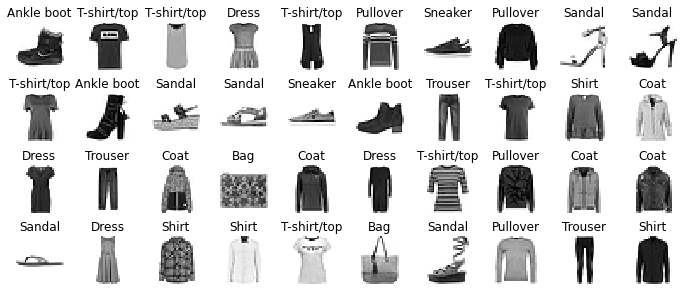

In [5]:
%matplotlib inline  
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Constructing a neural network

We create a neural network model (with the Sequential API of TensorFlow) that consists of a number of neurons that are arranged in three layers.

Do not worry about understanding the code for now, it becomes very clear within the next weeks. Just note that the last layer contains ten neurons to generate ten class scores.

Before you execute this part, go into the terminal window and execute nvidia-smi once again. Check the memory of your GPU. You should not occupy any memory yet. (Although another student might use the same GPU and already started to take up memory. But that should not be a problem with this notebook as it does not take up much memory at all.)

In [6]:
model = tf.keras.models.Sequential([
  # reshaping the input so that it can be input to a fully connected layer    
  tf.keras.layers.Flatten(input_shape=[28, 28]),
  # first hidden layer with 300 neurons, with Rectified Linear Unit activation    
  tf.keras.layers.Dense(300, activation='relu'),
  # second hidden layer with 100 neurons, with Rectified Linear Unit activation
  tf.keras.layers.Dense(100, activation='relu'), 
  # output layer, 10 classes
  tf.keras.layers.Dense(10, activation='softmax')
])

# show a summary of the layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


When constructing the model above, the first memory of the GPU is taken. If it fails, then you might be out of GPU memory. This could be because other students have in the meantime constructed their networks. Just restart the notebook and choose another GPU. And quickly execute the cells up to this point.

Check with the terminal window once again the memory usage. It should have increased by approximately 270MB.

## Training the neural network

We now train the neural network with the Fashion-MNIST training data. This should take 2-3 seconds per epoch and we train for 90 epochs.

In [7]:
# compiling the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model to the training data
print('Training model...\n')

# you can change the number of epochs to lower or higher numbers to train the network
# for a longer or shorter while. An epoch is when the network has seen all the training
# data one time.
history = model.fit(X_train, y_train, epochs=90, batch_size=32, validation_split=0.05)

print('\nModel trained successfully!')

Training model...

Epoch 1/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.7082 - accuracy: 0.7675 - val_loss: 0.5024 - val_accuracy: 0.8127
Epoch 2/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.4827 - accuracy: 0.8328 - val_loss: 0.4408 - val_accuracy: 0.8443
Epoch 3/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8462 - val_loss: 0.4789 - val_accuracy: 0.8190
Epoch 4/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.4115 - accuracy: 0.8562 - val_loss: 0.3852 - val_accuracy: 0.8587
Epoch 5/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.3944 - accuracy: 0.8626 - val_loss: 0.3976 - val_accuracy: 0.8603
Epoch 6/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.8667 - val_loss: 0.3911 - val_accuracy: 0.8610
Epoch 7/90
1782/1782 [==============================] - 2s 1ms/step - loss: 0.3648 - accuracy: 0.8711 - val_loss: 0.3

**You can check memory and GPU usage in the terminal window with the 'nvidia-smi' command while the training is in progress.**

Also in this step, you will occupy a little more memory from the GPU. Your personal memory usage should be approximately at 340MB.

## Evaluating the neural network

We evaluate the model on the unseen test data and show the loss (1st value) and the accuracy (2nd value). The closer the loss value is to 0.0, the better, and the higher the accuracy value is to 1.0, the better. The accuracy tells you how many times the prediction is right. (Multiply the number by 100 to get a percentage value.) Depending on how many epochs you trained the model, your accuracy should be close to 90%.

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 869us/step - loss: 0.4094 - accuracy: 0.8883


[0.4093968868255615, 0.8883000016212463]

## Make predictions on test data

Let's make some predictions on some images of the (unseen) test data.

In [11]:
# We need numpy for generating random values to pick random images.
import numpy as np
# Set a random seed in order to reproduce the results, images, etc.
np.random.seed(42)

First do a prediction on one random image from the test data set. You can repeat the next cell to make more predictions.

Although it is a random image, the random number generator is set up above to always give the same sequence of random numbers. Just deactivate np.random.seed(42) in the cell above to get totally random numbers if you want to and execute the cell again.

In [12]:
# generate a random index value
rnd = np.random.randint(0, X_test.shape[0], 1)

# pick a random image and predict the class
print(f'The image {rnd} is predicted to show a',
        class_names[np.argmax(model.predict(X_test[rnd]), axis=-1)[0]])

The image [7270] is predicted to show a T-shirt/top


Now lets do a few more predictions and show the results as the predicted label (Pred.), the real label (Real), and the image.

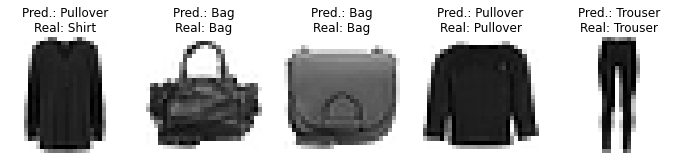

In [13]:
ncols = 5
fig_width = 2.4 * ncols

idx = np.random.randint(0, X_test.shape[0], size=ncols)

X_new = X_test[idx]
y_new = y_test[idx]

# This is where the prediction takes place.
y_pred = np.argmax(model.predict(X_new), axis=-1) # get the index class

fig, axs = plt.subplots(ncols=ncols, figsize=(fig_width, 2.4))
ind = []
for index, image in enumerate(X_new):
    ind.append(index) 
    ax = plt.subplot(1, ncols, index + 1)
    fig.add_subplot(ax)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    ax.set_title('Pred.: '+ class_names[y_pred[index]] + '\nReal: '+ class_names[y_test[idx[index]]])

# One last thing



<font color='red'>**Do not forget to close all kernels and log out once you are finished.**</font>